<a href="https://colab.research.google.com/github/KavindaRajapaksha/DeepLearning/blob/main/ImageClassifiarUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install opendatasets


In [7]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [3]:
od.download('https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kavindasrajapaksha
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:02<00:00, 95.3MB/s]


In [4]:
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

In [5]:
test_data_dir="/content/cats-and-dogs-for-classification/cats_dogs/test"
train_data_dir="/content/cats-and-dogs-for-classification/cats_dogs/train"

In [10]:
train_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         image_size=IMAGE_SIZE,
                                                         batch_size=BATCH_SIZE,
                                                       subset='training',
                                                       validation_split=0.1,
                                                       seed=42)
validation_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         image_size=IMAGE_SIZE,
                                                         batch_size=BATCH_SIZE,
                                                       subset='validation',
                                                       validation_split=0.1,
                                                       seed=42)
test_data=tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         image_size=IMAGE_SIZE,
                                                         batch_size=BATCH_SIZE)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [11]:
class_names= train_data.class_names
class_names

['cats', 'dogs']

In [12]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


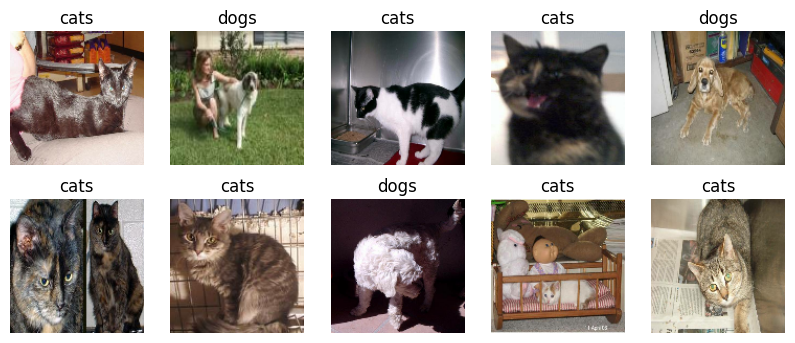

In [13]:
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [14]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

Feature scalling

In [15]:
train_data=train_data.map(lambda x,y:(x/255,y))
validation_data=validation_data.map(lambda x,y:(x/255,y))
test_data=test_data.map(lambda x,y:(x/255,y))

In [16]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

Data Augmentation

In [17]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal',input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model building

In [19]:
model = tf.keras.Sequential()
model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,325,825 (12.69 MB)

 Trainable params: 3,325,569 (12.69 MB)

 Non-trainable params: 256 (1.00 KB)

In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model trainnig

In [24]:
import time

start_time=time.time()
history=model.fit(train_data,
                  validation_data=validation_data,
                  epochs=10)
end_time=time.time()

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6566 - loss: 0.6152 - val_accuracy: 0.6712 - val_loss: 0.6139
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6761 - loss: 0.5916 - val_accuracy: 0.7188 - val_loss: 0.5397
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.6894 - loss: 0.5833 - val_accuracy: 0.5663 - val_loss: 0.6804
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7176 - loss: 0.5556 - val_accuracy: 0.6100 - val_loss: 0.9614
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7201 - loss: 0.5507 - val_accuracy: 0.5512 - val_loss: 0.8126
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.7173 - loss: 0.5526 - val_accuracy: 0.7225 - val_loss: 0.5798
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7377 - loss: 0.5194 - val_accuracy: 0.7688 - val_loss: 0.4886
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7561 - loss: 0.5045 - val_ac

In [25]:
history.history

{'accuracy': [0.659166693687439,
  0.680138885974884,
  0.6974999904632568,
  0.7177777886390686,
  0.7294444441795349,
  0.7247222065925598,
  0.7408333420753479,
  0.7522222399711609,
  0.7588889002799988,
  0.7633333206176758],
 'loss': [0.6126423478126526,
  0.5906686782836914,
  0.5763197541236877,
  0.5525885820388794,
  0.5420225262641907,
  0.5457848310470581,
  0.5168063044548035,
  0.5026330947875977,
  0.4936804175376892,
  0.4915522038936615],
 'val_accuracy': [0.6712499856948853,
  0.71875,
  0.5662500262260437,
  0.6100000143051147,
  0.5512499809265137,
  0.7225000262260437,
  0.768750011920929,
  0.7724999785423279,
  0.7762500047683716,
  0.7862499952316284],
 'val_loss': [0.6138929724693298,
  0.5396707653999329,
  0.680438220500946,
  0.9614195823669434,
  0.8126180768013,
  0.5797675848007202,
  0.4885599613189697,
  0.494112104177475,
  0.45761093497276306,
  0.4631384015083313]}

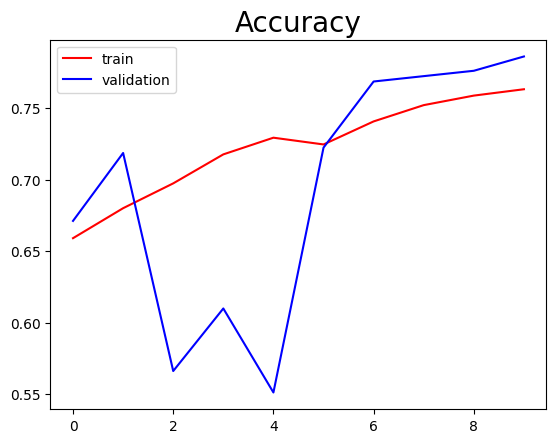

In [27]:
fig=plt.figure()
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('Accuracy', fontsize=20)
plt.legend()
plt.show()

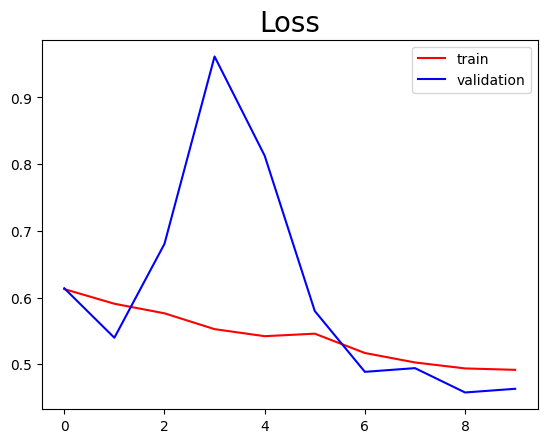

In [28]:
fig=plt.figure()
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss', fontsize=20)
plt.legend()
plt.show()

Model Evaluation

In [29]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
accuracy=tf.keras.metrics.BinaryAccuracy()

In [30]:
for batch in test_data.as_numpy_iterator():
  x,y=batch
  yhat=model.predict(x)
  precision.update_state(y,yhat)
  recall.update_state(y,yhat)
  accuracy.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━

In [31]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7376623153686523>

In [32]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8519999980926514>

In [33]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7745000123977661>

In [34]:
!pip install opencv.python

In [35]:
import cv2

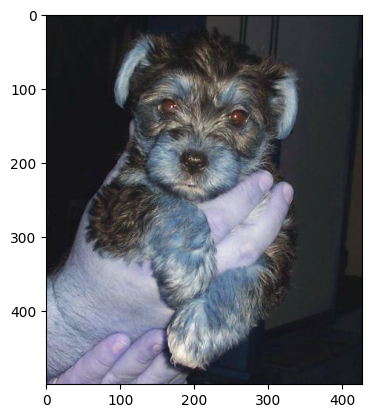

In [47]:
image = cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/test/dogs/dog.4002.jpg')
plt.imshow(image)
plt.show()

In [48]:
resized_image=tf.image.resize(image,IMAGE_SIZE)
scaled_image=resized_image/255

In [49]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.08774605, 0.09558919, 0.09951076],
        [0.08235294, 0.09019608, 0.09411765],
        [0.07658835, 0.08443148, 0.08835305],
        ...,
        [0.14399509, 0.1557598 , 0.17199755],
        [0.10992647, 0.11384804, 0.15306373],
        [0.09981617, 0.10765931, 0.13903186]],

       [[0.09411765, 0.10196079, 0.10588235],
        [0.0889007 , 0.09674384, 0.10066541],
        [0.08748564, 0.09532878, 0.09925035],
        ...,
        [0.14399509, 0.1557598 , 0.17199755],
        [0.10992647, 0.11384804, 0.15306373],
        [0.0916054 , 0.09944853, 0.13082108]],

       [[0.08627451, 0.09411765, 0.09803922],
        [0.08627451, 0.09411765, 0.09803922],
        [0.08964461, 0.09748775, 0.10140932],
        ...,
        [0.13318685, 0.14495155, 0.1611893 ],
        [0.10384593, 0.1077675 , 0.14698319],
        [0.10061274, 0.10845588, 0.13982843]],

       ...,

       [[0.30281383, 0.3216251 , 0.43038738],
        [0.27

In [50]:
np.expand_dims(scaled_image,0).shape

(1, 128, 128, 3)

In [51]:
y_hat=model.predict(np.expand_dims(scaled_image,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [52]:
y_hat

array([[0.63674766]], dtype=float32)

In [53]:
class_names

['cats', 'dogs']

In [54]:
if y_hat>=0.5:
  print(class_names[1])
else:
  print(class_names[0])

dogs
